### 1. Leitura e processamento dos dados
### 2. Análise gráfica
### 3. Análise descritiva
### 4. Correlações
### 5. Modelagem
### 6. Funcionalidades

# 1. Leitura e processamento dos dados

## Lendo banco de pontos turísticos

In [62]:
import pandas as pd
pto_tur2 = pd.read_csv("ptoreal.csv", encoding='iso-8859-1')
pto_tur2.head()

,Nome,Cidade,Tipo,Latitude/Longitude,HorÃ¡rio Funcionamento,Categoria,avaliacao
0,Cachoeira do azeite,Piedade do Rio Grande,Cachoeira,"-21.54726161249888, -44.18294297606091",24h,Aberto,4.8
1,Igreja Nossa senhora do RosÃ¡rio,Piedade do Rio Grande,Igreja,"-21.456223587339817, -44.198668769798225",NaN,Fechado,4.8
2,Igreja de Pedra (Nossa Senhora do RosÃ¡rio),Coronel Xavier Chaves - MG,igreja,"-21.02130878474155, -44.22366983310554",NaN,Fechado,5.0
3,PraÃ§a Salvador LourenÃ§o,Piedade do Rio Grande,PraÃ§a,"-21.45942305470554, -44.197974311525456",24h,Aberto,4.7
4,Cachoeira do Atalho,Dores dos campos,Cachoeira,"-21.101421336137957, -44.0321813889203",24h,Aberto,4.6


Tratamento de dados

Dropando horário de funcionamento por ter muitos dados faltantes

In [ ]:
pto_tur2 = pto_tur2.drop('HorÃ¡rio Funcionamento', axis=1)

Transformando coluna Latitude/Longitude em duas

In [103]:
pto_tur2[['Latitude', 'Longitude']] = pto_tur2['Latitude/Longitude'].str.split(',', expand=True)


Dropando a única

In [51]:
pto_tur2 = pto_tur2.drop('Latitude/Longitude', axis=1)

Removendo vírgula ao final da Latitude

In [53]:
pto_tur2['Latitude'] = pto_tur2['Latitude'].str.rstrip(',')

In [54]:
pto_tur2.head()

,Nome,Cidade,Tipo,Categoria,AvaliaÃ§Ã£o,Latitude,Longitude
0,Cachoeira do azeite,Piedade do Rio Grande,Cachoeira,Aberto,4.8,-21.54726161249888,-44.18294297606091
1,Igreja Nossa senhora do RosÃ¡rio,Piedade do Rio Grande,Igreja,Fechado,4.8,-21.456223587339817,-44.198668769798225
2,Igreja de Pedra (Nossa Senhora do RosÃ¡rio),Coronel Xavier Chaves - MG,igreja,Fechado,5.0,-21.02130878474155,-44.22366983310554
3,PraÃ§a Salvador LourenÃ§o,Piedade do Rio Grande,PraÃ§a,Aberto,4.7,-21.45942305470554,-44.197974311525456
4,Cachoeira do Atalho,Dores dos campos,Cachoeira,Aberto,4.6,-21.101421336137957,-44.0321813889203


## Lendo banco de dados Turista

In [72]:
import pandas as pd
turista = pd.read_csv("turista.csv", encoding='iso-8859-1')
turista.head()

,nome,genero,idade,grupo-ou-nao,local-de-origem,primeira-vez,viagens-pela-plataforma
0,Camila,feminino,32,sim,Fortaleza,NÃ£o,4
1,AndrÃ©,masculino,29,nÃ£o,SÃ£o Paulo,Sim,7
2,Renata,feminino,27,sim,Rio de Janeiro,NÃ£o,2
3,Leonardo,masculino,33,sim,Salvador,Sim,5
4,Juliana,feminino,30,sim,Recife,NÃ£o,4


In [75]:
turista.replace({'NÃ£o': 'Nao','nÃ£o' : 'Nao','sim': 'Sim'})

,nome,genero,idade,grupo-ou-nao,local-de-origem,primeira-vez,viagens-pela-plataforma
0,Camila,feminino,32,Sim,Fortaleza,Nao,4
1,AndrÃ©,masculino,29,Nao,SÃ£o Paulo,Sim,7
2,Renata,feminino,27,Sim,Rio de Janeiro,Nao,2
3,Leonardo,masculino,33,Sim,Salvador,Sim,5
4,Juliana,feminino,30,Sim,Recife,Nao,4
5,Daniel,masculino,28,Sim,BrasÃ­lia,Sim,6
6,Marina,feminino,26,Sim,FlorianÃ³polis,Nao,2
7,Carlos,masculino,31,Sim,Porto Alegre,Sim,8
8,Luiza,feminino,35,Sim,Belo Horizonte,Nao,3
9,Fernanda,feminino,29,Sim,Curitiba,Sim,6


In [104]:
turista.head()

,nome,genero,idade,grupo-ou-nao,local-de-origem,primeira-vez,viagens-pela-plataforma
0,Camila,feminino,32,sim,Fortaleza,NÃ£o,4
1,AndrÃ©,masculino,29,nÃ£o,SÃ£o Paulo,Sim,7
2,Renata,feminino,27,sim,Rio de Janeiro,NÃ£o,2
3,Leonardo,masculino,33,sim,Salvador,Sim,5
4,Juliana,feminino,30,sim,Recife,NÃ£o,4


In [107]:
pto_tur2.head()

,Nome,Cidade,Tipo,HorÃ¡rio Funcionamento,Categoria,avaliacao,Latitude,Longitude
0,Cachoeira do azeite,Piedade do Rio Grande,Cachoeira,24h,Aberto,4.8,-21.54726161249888,-44.18294297606091
1,Igreja Nossa senhora do RosÃ¡rio,Piedade do Rio Grande,Igreja,NaN,Fechado,4.8,-21.456223587339817,-44.198668769798225
2,Igreja de Pedra (Nossa Senhora do RosÃ¡rio),Coronel Xavier Chaves - MG,igreja,NaN,Fechado,5.0,-21.02130878474155,-44.22366983310554
3,PraÃ§a Salvador LourenÃ§o,Piedade do Rio Grande,PraÃ§a,24h,Aberto,4.7,-21.45942305470554,-44.197974311525456
4,Cachoeira do Atalho,Dores dos campos,Cachoeira,24h,Aberto,4.6,-21.101421336137957,-44.0321813889203


In [112]:
pto_tur2 = pd.get_dummies(data=pto_tur2, columns=['Tipo', 'Cidade','Categoria'])

Clustering - Pontos Turísticos

In [137]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=5).fit(pto_tur2)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = pto_tur2.index.values
cluster_map['cluster'] = km.labels_

c:\Users\gugah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [140]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
2,2,1
11,11,1
14,14,1
15,15,1
16,16,1


In [141]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
1,1,2
7,7,2
8,8,2
10,10,2
13,13,2
17,17,2
20,20,2


In [142]:
cluster_map[cluster_map.cluster == 3]

,data_index,cluster
0,0,3
3,3,3
4,4,3
22,22,3


In [143]:
cluster_map[cluster_map.cluster == 4]

,data_index,cluster
9,9,4
12,12,4
18,18,4
19,19,4
21,21,4


In [144]:
cluster_map[cluster_map.cluster == 5]

,data_index,cluster


In [151]:
dataset_ptos_init = pd.read_csv("ptoreal.csv", encoding='iso-8859-1')

In [153]:
pto_c1 = dataset_ptos_init.iloc[[2,11,14,15,16]]    # Select Rows by Index List
pto_c2 = dataset_ptos_init.iloc[[1,7,8,10,13,17,20]]    # Select Rows by Index List
pto_c3 = dataset_ptos_init.iloc[[0,3,4,22]]    # Select Rows by Index List
pto_c4 = dataset_ptos_init.iloc[[9,12,18,19,21]]    # Select Rows by Index List

Clustering Turistas

In [145]:
from sklearn.cluster import KMeans


km = KMeans(n_clusters=5).fit(turista)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = turista.index.values
cluster_map['cluster'] = km.labels_

c:\Users\gugah\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [146]:
cluster_map[cluster_map.cluster == 1]

,data_index,cluster
1,1,1
5,5,1
9,9,1
14,14,1
15,15,1
18,18,1
20,20,1
21,21,1
23,23,1
29,29,1


In [147]:
cluster_map[cluster_map.cluster == 2]

,data_index,cluster
0,0,2
4,4,2
12,12,2
13,13,2
16,16,2
17,17,2
27,27,2
28,28,2
32,32,2
33,33,2


In [148]:
cluster_map[cluster_map.cluster == 3]

,data_index,cluster
2,2,3
6,6,3
11,11,3
19,19,3
25,25,3
30,30,3
35,35,3


In [149]:
cluster_map[cluster_map.cluster == 4]

,data_index,cluster
8,8,4
10,10,4
22,22,4
49,49,4


In [154]:
dataset_tur_init = pd.read_csv("turista.csv", encoding='iso-8859-1')

In [155]:
tur_c1 = dataset_tur_init.iloc[[1,5,9,14,15,18,20,21,23,29,34,41,43,44,45,48]]    # Select Rows by Index List
tur_c2 = dataset_tur_init.iloc[[0,4,12,13,16,17,27,28,32,33,37,40,42,47]]    # Select Rows by Index List
tur_c3 = dataset_tur_init.iloc[[2,6,11,19,25,30,35]]    # Select Rows by Index List
tur_c4 = dataset_tur_init.iloc[[8,10,22,49]] 

In [150]:
cluster_map[cluster_map.cluster == 5]

,data_index,cluster


In [116]:
turista = pd.get_dummies(data=turista, columns=['grupo-ou-nao', 'local-de-origem','primeira-vez'])

In [132]:
pto_tur2_corr = pd.DataFrame(pto_tur2.corr())

C:\Users\gugah\AppData\Local\Temp\ipykernel_22736\1505926229.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pto_tur2_corr = pd.DataFrame(pto_tur2.corr())


In [133]:
pto_tur2_corr.head()

,avaliacao,Tipo_Cachoeira,Tipo_Hotel,Tipo_Igreja,Tipo_Pizzaria,Tipo_Ponto TurÃ­stico,Tipo_Pousada,Tipo_PraÃ§a,Tipo_Restaurante,Tipo_igreja,Cidade_Coronel Xavier Chaves - MG,Cidade_Dores de Campos,Cidade_Dores dos campos,Cidade_Piedade do Rio Grande,Cidade_Piedade do Rio Grande,Cidade_SÃ£o Vicente de Minas,Categoria_Aberto,Categoria_Fechado
avaliacao,1.000000,0.111650,-0.741870,0.348040,0.019905,0.134362,-0.067800,0.077134,0.247268,0.248818,0.248818,-0.063970,0.019905,-0.284422,0.227580,0.134362,0.196790,-0.196790
Tipo_Cachoeira,0.111650,1.000000,-0.183340,-0.119523,-0.065795,-0.065795,-0.119523,-0.065795,-0.162650,-0.065795,-0.065795,-0.162650,0.690849,0.013430,-0.141598,-0.065795,0.672593,-0.672593
Tipo_Hotel,-0.741870,-0.183340,1.000000,-0.230089,-0.126660,-0.126660,-0.230089,-0.126660,-0.313112,-0.126660,-0.126660,0.407046,-0.126660,-0.172363,-0.011358,-0.126660,-0.272587,0.272587
Tipo_Igreja,0.348040,-0.119523,-0.230089,1.000000,-0.082572,-0.082572,-0.150000,-0.082572,-0.204124,-0.082572,-0.082572,0.421857,-0.082572,-0.112367,-0.177705,-0.082572,-0.177705,0.177705
Tipo_Pizzaria,0.019905,-0.065795,-0.126660,-0.082572,1.000000,-0.045455,-0.082572,-0.045455,-0.112367,-0.045455,-0.045455,-0.112367,-0.045455,-0.204124,0.464660,-0.045455,-0.097823,0.097823


In [134]:
turista_corr = pd.DataFrame(turista.corr())

In [136]:
turista_corr.head()

,idade,viagens-pela-plataforma,grupo-ou-nao_nÃ£o,grupo-ou-nao_sim,local-de-origem_Belo Horizonte,local-de-origem_BelÃ©m,local-de-origem_BrasÃ­lia,local-de-origem_Curitiba,local-de-origem_FlorianÃ³polis,local-de-origem_Fortaleza,local-de-origem_Manaus,local-de-origem_Porto Alegre,local-de-origem_Recife,local-de-origem_Rio de Janeiro,local-de-origem_Salvador,local-de-origem_SÃ£o Paulo,primeira-vez_NÃ£o,primeira-vez_Sim
idade,1.000000,-0.148247,-0.067017,0.067017,0.064907,-0.067017,-0.119787,-0.132115,-0.132115,0.064907,-0.039685,0.133435,0.169183,0.002089,-0.060572,0.075758,0.332880,-0.332880
viagens-pela-plataforma,-0.148247,1.000000,0.007753,-0.007753,-0.031011,0.085279,-0.147300,-0.013573,-0.047506,-0.031011,-0.122743,0.209633,-0.092057,-0.337544,0.214801,0.291822,-0.831870,0.831870
grupo-ou-nao_nÃ£o,-0.067017,0.007753,1.000000,-1.000000,-0.063830,-0.063830,-0.063830,-0.074501,-0.074501,-0.063830,-0.084215,0.165859,-0.084215,-0.084215,0.196502,0.235920,-0.044363,0.044363
grupo-ou-nao_sim,0.067017,-0.007753,-1.000000,1.000000,0.063830,0.063830,0.063830,0.074501,0.074501,0.063830,0.084215,-0.165859,0.084215,0.084215,-0.196502,-0.235920,0.044363,-0.044363
local-de-origem_Belo Horizonte,0.064907,-0.031011,-0.063830,0.063830,1.000000,-0.063830,-0.063830,-0.074501,-0.074501,-0.063830,-0.084215,-0.093296,-0.084215,-0.084215,-0.084215,-0.074501,0.126265,-0.126265


In [122]:
turista_corr = turista.corr()

In [118]:
turista = turista.drop('genero', axis=1)

In [115]:
turista = turista.drop('nome', axis=1)

In [106]:
pto_tur2 = pto_tur2.drop('Latitude/Longitude', axis=1)

In [108]:
pto_tur2 = pto_tur2.drop('HorÃ¡rio Funcionamento', axis=1)

In [109]:
pto_tur2 = pto_tur2.drop('Nome', axis=1)

In [ ]:
pto_tur2 = pto_tur2.drop('Latitude/Longitude', axis=1)

# 2. Análise Gráfica

Unidimensional

Histograma da Avaliação dos pontos turísticos

<AxesSubplot: >

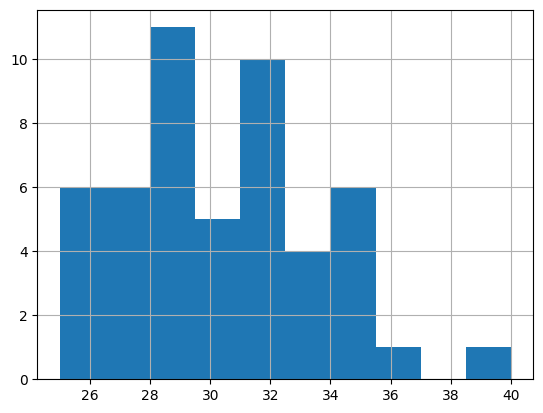

In [92]:
turista['idade'].hist(bins = 10)

<AxesSubplot: >

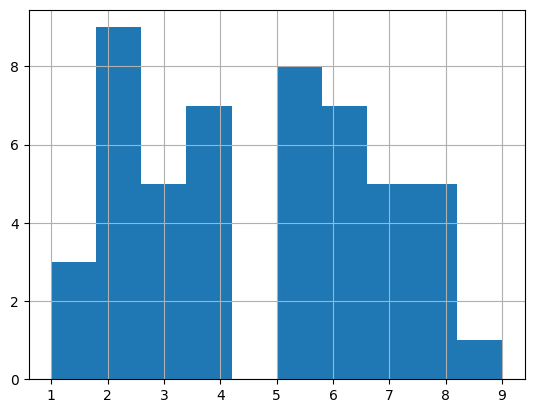

In [90]:
turista['viagens-pela-plataforma'].hist(bins = 10)

<AxesSubplot: >

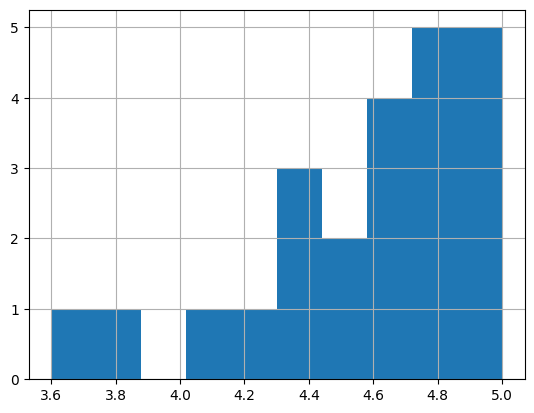

In [76]:
pto_tur2['avaliacao'].hist(bins = 10)

In [79]:
turista.head()

,nome,genero,idade,grupo-ou-nao,local-de-origem,primeira-vez,viagens-pela-plataforma
0,Camila,feminino,32,sim,Fortaleza,NÃ£o,4
1,AndrÃ©,masculino,29,nÃ£o,SÃ£o Paulo,Sim,7
2,Renata,feminino,27,sim,Rio de Janeiro,NÃ£o,2
3,Leonardo,masculino,33,sim,Salvador,Sim,5
4,Juliana,feminino,30,sim,Recife,NÃ£o,4


Bidimensional

In [78]:
import seaborn as sns

<AxesSubplot: xlabel='genero', ylabel='count'>

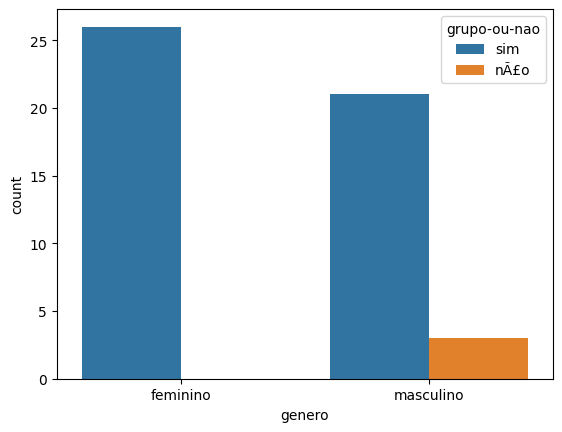

In [85]:
sns.countplot(x='genero', hue='grupo-ou-nao', data=turista)

<AxesSubplot: xlabel='genero', ylabel='count'>

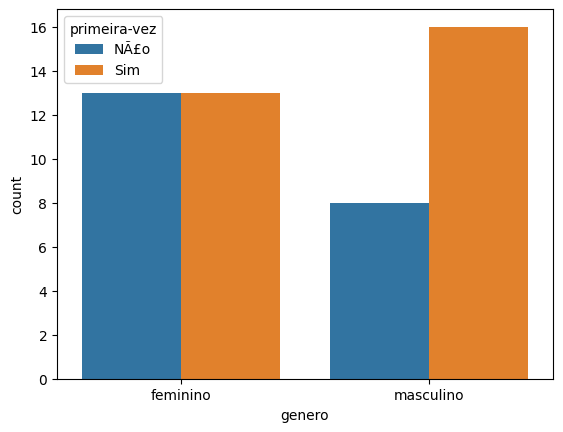

In [84]:
sns.countplot(x='genero', hue='primeira-vez', data=turista)

<AxesSubplot: xlabel='genero', ylabel='count'>

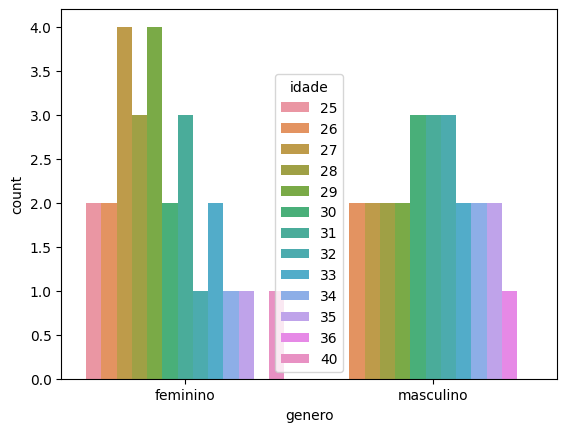

In [83]:
sns.countplot(x='genero', hue='idade', data=turista)

<AxesSubplot: xlabel='genero', ylabel='count'>

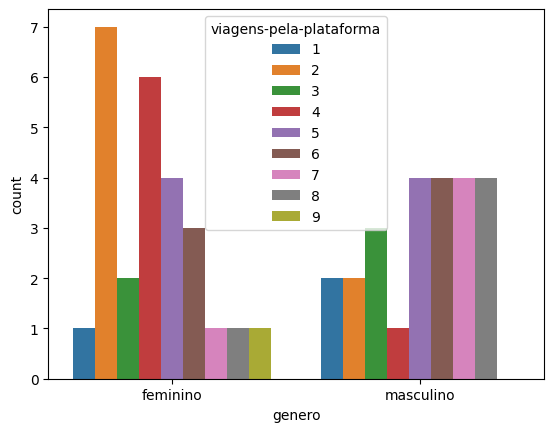

In [82]:
sns.countplot(x='genero', hue='viagens-pela-plataforma', data=turista)

<AxesSubplot: xlabel='genero', ylabel='count'>

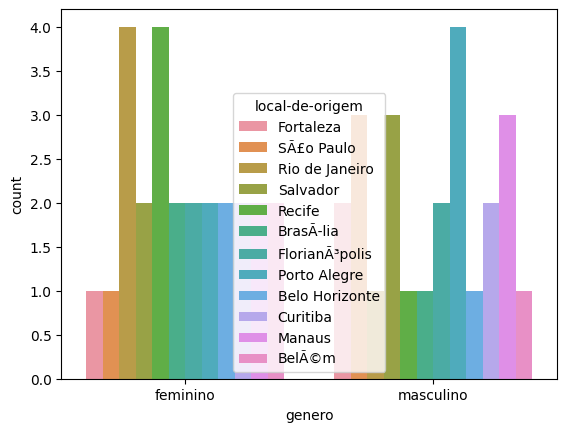

In [87]:
sns.countplot(x='genero', hue='local-de-origem', data=turista)

<AxesSubplot: xlabel='grupo-ou-nao', ylabel='count'>

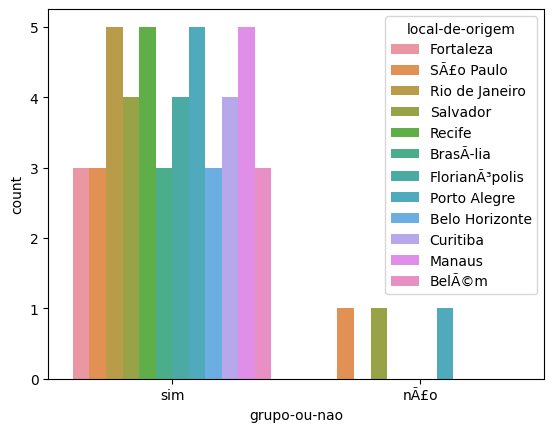

In [80]:
sns.countplot(x='grupo-ou-nao', hue='local-de-origem', data=turista)

In [77]:
pto_tur2.head()

,Nome,Cidade,Tipo,Latitude/Longitude,HorÃ¡rio Funcionamento,Categoria,avaliacao
0,Cachoeira do azeite,Piedade do Rio Grande,Cachoeira,"-21.54726161249888, -44.18294297606091",24h,Aberto,4.8
1,Igreja Nossa senhora do RosÃ¡rio,Piedade do Rio Grande,Igreja,"-21.456223587339817, -44.198668769798225",NaN,Fechado,4.8
2,Igreja de Pedra (Nossa Senhora do RosÃ¡rio),Coronel Xavier Chaves - MG,igreja,"-21.02130878474155, -44.22366983310554",NaN,Fechado,5.0
3,PraÃ§a Salvador LourenÃ§o,Piedade do Rio Grande,PraÃ§a,"-21.45942305470554, -44.197974311525456",24h,Aberto,4.7
4,Cachoeira do Atalho,Dores dos campos,Cachoeira,"-21.101421336137957, -44.0321813889203",24h,Aberto,4.6


## 3. Análise descritiva

Análise de variabilidade das avaliações dos pontos turísticos

In [67]:
import numpy as np

In [69]:
np.percentile(pto_tur2['avaliacao'], 25)


4.3

In [70]:
np.percentile(pto_tur2['avaliacao'], 50)

4.7

In [71]:
np.percentile(pto_tur2['avaliacao'], 75)

4.8

In [93]:
pto_tur2['avaliacao'].describe()

count    23.000000
mean      4.565217
std       0.380918
min       3.600000
25%       4.300000
50%       4.700000
75%       4.800000
max       5.000000
Name: avaliacao, dtype: float64

In [94]:
pto_tur2.loc[pto_tur2['avaliacao'] <= 4.0 ]['Nome']


5         Hotel irmÃ£os Fagundes
6    Quincas hotel e restaurante
Name: Nome, dtype: object

<AxesSubplot: >

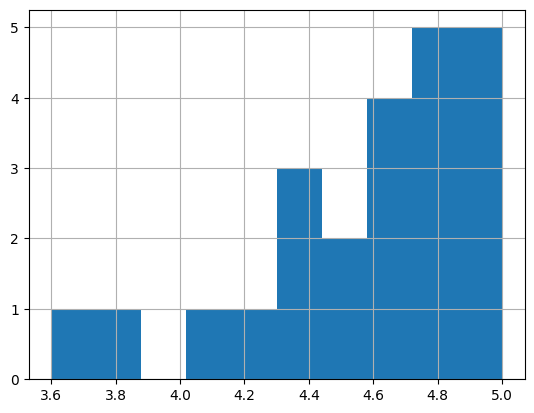

In [63]:
pto_tur2['avaliacao'].hist(bins = 10)

In [55]:
def calcular_distancia (longitude1, latitude1, longitude2, latitude2):
    
    coords_1 = (longitude1, latitude1)
    coords_2 = (longitude2, latitude2)
    
    dist = geopy.distance.geodesic(coords_1, coords_2).km
    return dist

In [57]:
pto_tur2['avaliacao'].hist(bins = 10)

KeyError: 'avaliacao'

In [43]:
pto_tur.head()

,nome,tipo,longitude,latitude,endereco,avaliacao,horario-func,tipo-ambiente,cidade
0,Restaurante Aconchegante,Restaurante,-43.1754,-22.9173,Rua das Flores,4.5,12:00-22:00,Comida Variada,SÃ£o Paulo
1,CafÃ© do Bairro,CafÃ©,-46.6345,-23.5568,Avenida Central,4.2,07:00-19:00,AmigÃ¡vel,Rio de Janeiro
2,Pizzaria Saborosa,Pizzaria,-47.3667,-23.5632,Rua das Pizzas,4.7,17:00-23:00,Aconchegante,Curitiba
3,Bar do Samba,Bar,-48.0711,-22.8362,Avenida do Samba,4.0,18:00-02:00,Animado,Salvador
4,Restaurante da VovÃ³,Restaurante,-46.5918,-23.5387,Rua das RecordaÃ§Ãµes,4.8,11:30-20:30,Tradicional,Porto Alegre


Turista

## Gráfio de densidade

Ponto Turístico

Turista

<AxesSubplot: ylabel='Density'>

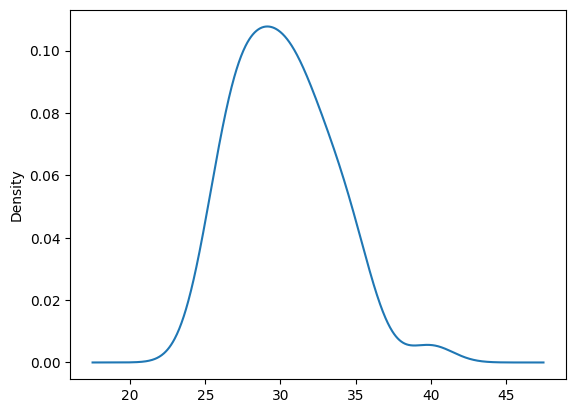

In [29]:
turista['idade'].plot(kind='density')

C:\Users\gugah\AppData\Local\Temp\ipykernel_22736\1302409393.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(turista['idade'])


<AxesSubplot: xlabel='idade', ylabel='Density'>

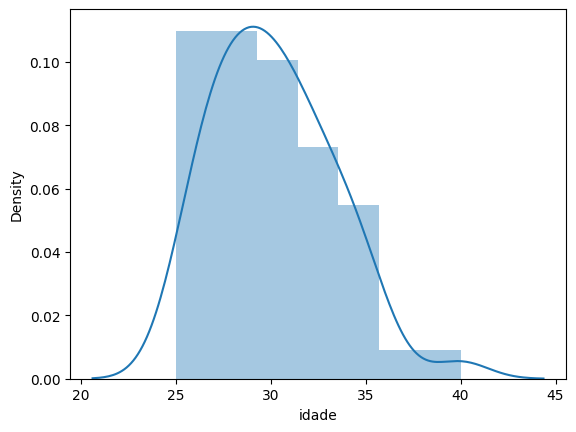

In [23]:
import seaborn as sns
sns.distplot(turista['idade'])

In [31]:
def gerar_boxplot(x):
    y = sns.boxplot(x='idade', data=turista)
    return y

In [36]:
from scipy.stats import skew
skew(turista['idade'])

0.5779431807206036

<AxesSubplot: xlabel='idade'>

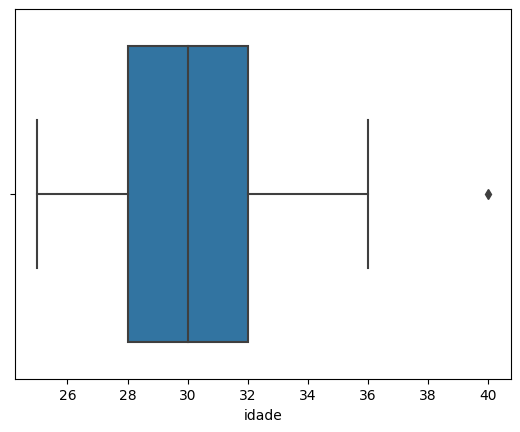

In [34]:

x = 'idade'
gerar_boxplot(x)

In [25]:
sexo = turista['genero'].value_counts()

<AxesSubplot: ylabel='genero'>

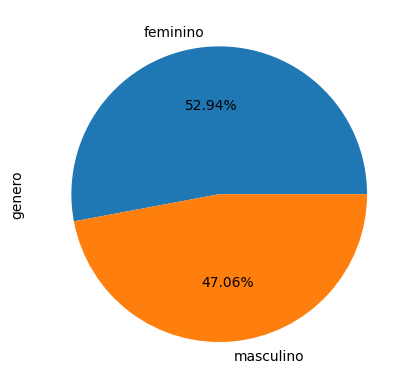

In [26]:

sexo.plot(kind='pie', autopct='%1.2f%%')

bidimensional countxqual

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: xlabel='genero', ylabel='count'>

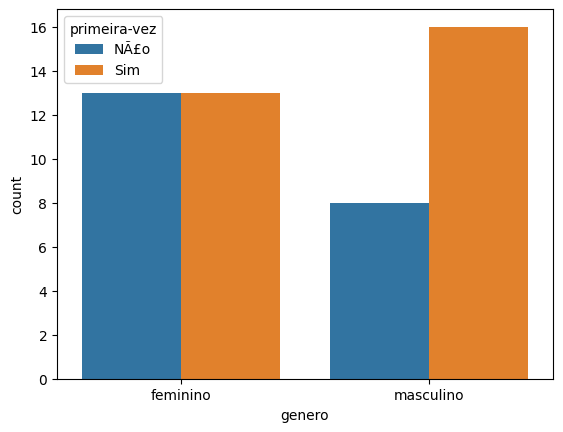

In [30]:
sns.countplot(x='genero', hue='primeira-vez', data=turista)

<AxesSubplot: xlabel='genero', ylabel='count'>

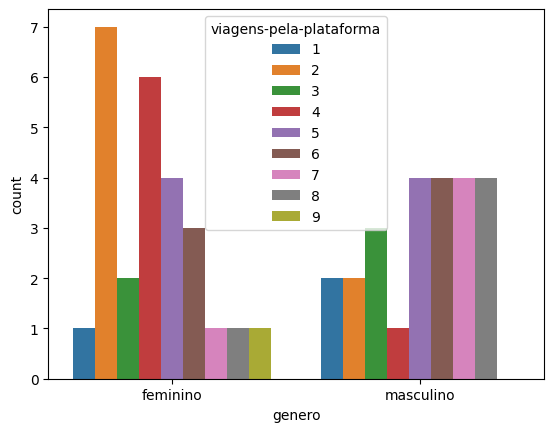

In [39]:
sns.countplot(x='genero', hue='viagens-pela-plataforma', data=turista)

## Contando valores únicos

In [37]:
turista['local-de-origem'].nunique()

12